# Fáza 1 - prieskumná analýza
# Autori: Matej Delinčák (50%), Martin Pirkovský (50%)

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import kruskal
from scipy import stats
import matplotlib
import matplotlib.pylab as pylab


# 1. Základný opis dát spolu s ich charakteristikami (5 bodov)

In [139]:
# Načítame data zo súboru profiles.csv s oddelovačom tabulátor. Pretože dátumy mali rôzne formáty, všetky sme ich dali na jednotný pomocou parse_dates

filename = "001/profiles.csv"
df_profiles = pd.read_csv(filename, sep='\t', parse_dates=['birthdate'])
df_profiles.drop('Unnamed: 0', axis=1, inplace=True)
df_profiles.head()

sex blood_group                        job  \
0   M          B-            Legal executive   
1   F          B+              Oceanographer   
2   F         AB+         Academic librarian   
3   F         AB+  Editor, magazine features   
4   F          O+    Secretary/administrator   

                                           residence  birthdate          ssn  \
0           528 Allen Streets\nSolomonberg, NM 26158 1941-05-28  359-18-7254   
1  360 Rebecca Islands Suite 046\nEast Yolandavie... 1992-08-29  476-75-8468   
2     146 Ball Radial Suite 394\nEast Mark, AL 82880 1978-12-16  425-66-2119   
3  67264 Patterson Plains Apt. 319\nKennethshire,... 1921-04-07  869-12-0117   
4       0975 Allen Manor\nSouth Davidville, NJ 88311 1998-12-07  296-87-0260   

                                  current_location    race  \
0   (Decimal('29.4768335'), Decimal('-42.485892'))   White   
1  (Decimal('-80.467120'), Decimal('-106.725872'))   White   
2   (Decimal('-54.963860'), Decimal('-43.530569'))  Indian   
3    (Decimal('-79.5156495'), Decimal('8.453819'))   Black   
4    (Decimal('49.395910'), Decimal('-15.478698'))   Asian   

                   name  
0         John Fletcher  
1       Alexis Benjamin  
2           Heather Lee  
3           Laura Roman  
4  Miss Phyllis Oconnor

In [140]:
# Zobrazíme počet záznamov v datasete profiles
len(df_profiles)

3134

In [141]:
# Ukážeme ake majú typy atribúty v tabuľke
df_profiles.dtypes

sex                         object
blood_group                 object
job                         object
residence                   object
birthdate           datetime64[ns]
ssn                         object
current_location            object
race                        object
name                        object
dtype: object

In [142]:
# Zobrazíme počet atributov v datasete profiles
len(df_profiles.columns)

9

# Sumarizácia dát z profiles.csv 

Obsahuje 3134 záznamov s informáciami o pacientoch. Počet atribútov je rovný deviatim (mínus poradie záznamu). Vidíme, že všetky tieto atribúty su nejaké reťazce až na jeden. Tým je dátum narodenia, ktorý sme pri načítaní upravili na správny formát.

Zoznam jednotlivých atribútov:

1. sex - pohlavie
2. blood_group - krvná skupina
3. job - zamestnanie
4. residence - bydlisko
5. ssn - social security number
6. birthdate - dátum narodenia
7. current_location - aktuálne miesto zdržovania
8. race - rasa
9. name - meno a priezvisko 


In [143]:
# Načítame data zo súboru labor.csv s oddelovačom tabulátor.
filename = "001/labor.csv"
df_labor = pd.read_csv(filename, sep='\t')
df_labor.drop('Unnamed: 0', axis=1, inplace=True)
df_labor.head()

erytrocyty  trombocyty     weight                 name    hbver  \
0     5.75358     6.28829   72.99562         Ashley Mejia  7.83739   
1     5.14673     7.42473   27.01891  Nicholas Cunningham  4.93689   
2     8.85321     6.19191   85.97257           Amy Pineda  7.81238   
3     8.08038     6.66572   80.02693    Elizabeth Higgins  6.91584   
4     8.91498     6.56509  119.48958         Andrew Ochoa  4.45796   

           ssn relationship     er-cv smoker  indicator  hematokrit  \
0  825-87-2350    separated  69.02328      N        0.0     6.68084   
1  180-95-1359      divoced  48.89584      N        1.0     6.67915   
2  265-20-0465          nop  61.76278     no        0.0     8.37365   
3  075-09-7694    separated  44.51141     no        0.0     6.65188   
4  850-79-7623    separated  42.06448     no        1.0     5.07778   

   leukocyty       alp  hemoglobin       ast      alt    etytr  
0    7.69536  76.74660     6.82079  61.73234  0.70514  4.81412  
1    7.92839  17.17255     8.83229  78.07931  0.70497  5.96530  
2    7.08646   9.29056     9.58719  74.48225  3.77250  7.79349  
3    8.49326  86.51256     5.78670  79.12359  2.39353  6.74682  
4    5.72269  43.22939     7.71585  81.58218  4.34586  5.84598

In [144]:
# Zobrazíme počet záznamov v datasete labor
len(df_labor)

9965

In [145]:
# Ukážeme ake majú typy atribúty v datasete labor
df_labor.dtypes

erytrocyty      float64
trombocyty      float64
weight          float64
name             object
hbver           float64
ssn              object
relationship     object
er-cv           float64
smoker           object
indicator       float64
hematokrit      float64
leukocyty       float64
alp             float64
hemoglobin      float64
ast             float64
alt             float64
etytr           float64
dtype: object

In [146]:
# Zobrazíme počet atributov v datasete profiles
len(df_labor.columns)

17

In [147]:
# Vyznamné atribúty a ich distribúcie
df_labor.describe()

erytrocyty   trombocyty       weight        hbver        er-cv  \
count  9934.000000  9933.000000  9965.000000  9934.000000  9935.000000   
mean      6.797654     6.801356    69.848895     7.191444    54.908339   
std       1.586898     1.003547    34.893262     1.726068    11.641219   
min       2.538130     2.785270   -51.100280     1.511190     0.000000   
25%       5.555995     6.127400    46.691580     5.924910    47.103720   
50%       6.581820     6.821450    69.757770     7.245140    54.728850   
75%       7.990825     7.477460    92.938000     8.391027    62.820825   
max      12.235280    10.678970   200.452940    13.809250   100.000000   

         indicator   hematokrit    leukocyty          alp   hemoglobin  \
count  9965.000000  9935.000000  9935.000000  9935.000000  9934.000000   
mean      0.642047     6.824045     7.231332    68.678554     6.808648   
std       0.479422     0.997373     1.649775    19.947629     1.007662   
min       0.000000     2.665920     0.000000     0.000000     2.561810   
25%       0.000000     6.167460     6.350435    57.960030     6.120163   
50%       1.000000     6.829680     7.539140    75.433870     6.810990   
75%       1.000000     7.493555     8.371275    83.795710     7.496847   
max       1.000000    10.643140    12.060330   100.000000    10.245150   

               ast          alt        etytr  
count  9934.000000  9935.000000  9935.000000  
mean     73.539640     2.436029     6.804298  
std       6.399017     4.409714     1.531073  
min       0.000000     0.000000     2.478170  
25%      69.263925     0.922845     5.571580  
50%      73.536730     1.244000     6.595960  
75%      77.768900     2.269250     8.014680  
max     100.000000   100.000000    13.764860

# Sumarizácia dát z labor.csv 

Obsahuje 9965 záznamov s informáciami o pacientoch. Počet atribútov je rovný 17 (mínus poradie záznamu). Vidíme, že skoro všetky tieto atribúty su nejaké číselné hodnoty.

Zoznam jednotlivých atribútov:

1. erytrocyty - hodnota červených krviniek v krvi 
2. trombocyty - hodnota krvných doštičiek v krvi
3. weight - hmotnosť
4. name - meno a priezvisko
5. hbver - hodnota nosiča vírusu hepatitídy typu B
6. ssn - social security number
7. relationship - rodinný stav
8. er-cv - hodnota pravdepodobnosti ochorenia typu kardiovaskulárnych ochorení s pacietami so zvýšenou hladinou estrogénu
9. smoker - fajčiar
10. indicator - nájdená choroba - rakovina
11. hematokrit - podiel červených krviniek na celkový objem krvi
12. leukocyty - hodnota bielych krviniek v krvi
13. alp - hodnotu enzýmu alkalín fosfátu v krvi
14. hemoglobin - hodnota červeného krvného farbiva v krvi
15. alt - hodnotu enzýmu alanín transaminín v krvi
16. ast - hodnotu enzýmu aspartat aminotransferasín v krvi
17. etytr - nenašli sme

In [148]:
# Dva datasety spojíme na základe mena a použijeme full outer join, aby nám ostali všetky stĺpce

df_merged = pd.merge(df_profiles,df_labor,on='name',how='outer')
df_merged.head()

sex blood_group              job  \
0   M          B-  Legal executive   
1   M          B-  Legal executive   
2   M          B-  Legal executive   
3   M          B-  Legal executive   
4   F          B+    Oceanographer   

                                           residence  birthdate        ssn_x  \
0           528 Allen Streets\nSolomonberg, NM 26158 1941-05-28  359-18-7254   
1           528 Allen Streets\nSolomonberg, NM 26158 1941-05-28  359-18-7254   
2           528 Allen Streets\nSolomonberg, NM 26158 1941-05-28  359-18-7254   
3           528 Allen Streets\nSolomonberg, NM 26158 1941-05-28  359-18-7254   
4  360 Rebecca Islands Suite 046\nEast Yolandavie... 1992-08-29  476-75-8468   

                                  current_location   race             name  \
0   (Decimal('29.4768335'), Decimal('-42.485892'))  White    John Fletcher   
1   (Decimal('29.4768335'), Decimal('-42.485892'))  White    John Fletcher   
2   (Decimal('29.4768335'), Decimal('-42.485892'))  White    John Fletcher   
3   (Decimal('29.4768335'), Decimal('-42.485892'))  White    John Fletcher   
4  (Decimal('-80.467120'), Decimal('-106.725872'))  White  Alexis Benjamin   

   erytrocyty  ...     er-cv  smoker  indicator hematokrit leukocyty  \
0     5.73089  ...  54.28887       N        1.0    6.68658   8.13103   
1     7.00210  ...  47.56065      no        1.0    8.14919   7.95707   
2     5.87203  ...  53.69510     yes        1.0    8.61871   8.80296   
3     8.87748  ...  53.84332       Y        1.0    6.05747   7.70553   
4     5.51507  ...  36.38495      no        1.0    8.41361   8.02251   

        alp hemoglobin       ast      alt    etytr  
0  71.53264    5.51496  72.78350  1.40153  8.26858  
1  53.26854    7.70607  70.42034  1.08658  8.76562  
2  71.23821    5.67911  63.46493  0.94280  7.87057  
3  64.00914    5.27333  76.12388  4.43028  6.29355  
4  86.54993    6.48007  84.46566  1.39040  7.38177  

[5 rows x 25 columns]

In [149]:
# Zobrazíme počet záznamov v spojenom dataframe-e
len(df_merged)

10495

In [150]:
# Ukážeme ake majú typy atribúty v mergnutom datasete
df_merged.dtypes

sex                         object
blood_group                 object
job                         object
residence                   object
birthdate           datetime64[ns]
ssn_x                       object
current_location            object
race                        object
name                        object
erytrocyty                 float64
trombocyty                 float64
weight                     float64
hbver                      float64
ssn_y                       object
relationship                object
er-cv                      float64
smoker                      object
indicator                  float64
hematokrit                 float64
leukocyty                  float64
alp                        float64
hemoglobin                 float64
ast                        float64
alt                        float64
etytr                      float64
dtype: object

In [151]:
# Zobrazíme počet atribútov v spojenom dataframe-e
len(df_merged.columns)

25

In [152]:
# Zobrazíme významné atributy a ich distribucie v spojenom dataframe-e
df_merged.describe()

erytrocyty    trombocyty        weight         hbver         er-cv  \
count  10464.000000  10462.000000  10495.000000  10464.000000  10464.000000   
mean       6.797553      6.800557     70.036078      7.189203     54.895975   
std        1.584803      1.005890     34.875698      1.732465     11.638543   
min        2.538130      2.785270    -51.100280      1.511190      0.000000   
25%        5.559750      6.124598     46.770755      5.906990     47.064177   
50%        6.582500      6.822390     69.897610      7.248590     54.761415   
75%        7.985615      7.478460     93.122510      8.398238     62.805137   
max       12.235280     10.678970    200.452940     13.809250    100.000000   

          indicator    hematokrit     leukocyty           alp    hemoglobin  \
count  10495.000000  10465.000000  10464.000000  10465.000000  10462.000000   
mean       0.642211      6.824631      7.227896     68.704426      6.807972   
std        0.479373      0.997630      1.648886     19.911391      1.006951   
min        0.000000      2.665920      0.000000      0.000000      2.561810   
25%        0.000000      6.166980      6.346930     58.057720      6.120150   
50%        1.000000      6.831870      7.536260     75.461340      6.808200   
75%        1.000000      7.495720      8.365932     83.817770      7.493805   
max        1.000000     10.643140     12.060330    100.000000     10.245150   

                ast           alt         etytr  
count  10462.000000  10463.000000  10463.000000  
mean      73.526168      2.428059      6.805558  
std        6.420153      4.364798      1.533215  
min        0.000000      0.000000      2.478170  
25%       69.238322      0.924240      5.570295  
50%       73.521405      1.244000      6.606850  
75%       77.759380      2.267315      8.017560  
max      100.000000    100.000000     13.764860

# 4. Identifikácia problémov v dátach s navrhnuným riešením v ďalšej fáze (3 body)

In [153]:
# Zobrazíme počet "null" hodnôt v spojenom dataframe-e
df_merged.isnull().sum()

sex                  0
blood_group          0
job                  0
residence            0
birthdate            0
ssn_x                0
current_location     0
race                 0
name                 0
erytrocyty          31
trombocyty          33
weight               0
hbver               31
ssn_y                0
relationship         0
er-cv               31
smoker               0
indicator            0
hematokrit          30
leukocyty           31
alp                 30
hemoglobin          33
ast                 33
alt                 32
etytr               32
dtype: int64

In [154]:
# A následne vymazanie riadkov s "null" hodnotami -> take predsa nechceme :)
df_merged.dropna(subset = ["erytrocyty", "trombocyty", "hbver", "er-cv", "hematokrit", "leukocyty", "alp", "hemoglobin", "ast", "alt", "etytr"], inplace=True)

In [155]:
# Vymazanie duplikátov v dataframe-e
df_merged.drop_duplicates

<bound method DataFrame.drop_duplicates of       sex blood_group                            job  \
0       M          B-                Legal executive   
1       M          B-                Legal executive   
2       M          B-                Legal executive   
3       M          B-                Legal executive   
4       F          B+                  Oceanographer   
...    ..         ...                            ...   
10490   M          O-     Designer, interior/spatial   
10491   M          O-     Designer, interior/spatial   
10492   F          O+  Telecommunications researcher   
10493   F          O+  Telecommunications researcher   
10494   F          O+  Telecommunications researcher   

                                               residence  birthdate  \
0               528 Allen Streets\nSolomonberg, NM 26158 1941-05-28   
1               528 Allen Streets\nSolomonberg, NM 26158 1941-05-28   
2               528 Allen Streets\nSolomonberg, NM 26158 1941-05-28   


In [156]:
# Funkcia identify_outliers slúži na identifikovanie outlierov vrámci jedného stĺpca dataframe-u
def identify_outliers(x):
    lower = x.quantile(0.25) - 1.5 * stats.iqr(x)
    upper = x.quantile(0.75) + 1.5 * stats.iqr(x)

    return x[(x > upper) | (x < lower)]

# v numerics vytiahneme z dataframe-u len stlpce, ktoré majú číselné hodnoty
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df_merged.select_dtypes(include=numerics)

# a pre každý stĺpec identifikujeme outlierov, ktorých nasledne vymazeme
for column in newdf.columns:
    df_merged_out = identify_outliers(df_merged[column])
    df_merged = df_merged.drop(df_merged_out.index)

In [157]:
# Nahradenie hodnôt, ktoré mali zle údaje a v stĺpci smoker no za 0, a yes za 1 => aby sme mohli vyuzit číselné hodnoty
# Pridaný stĺpec "age"
df_merged.replace('no', 0, inplace=True)
df_merged.replace('yes', 1, inplace=True)
df_merged.replace('N', 0, inplace=True)
df_merged.replace('Y', 1, inplace=True)
df_merged.replace('divoced', 'divorced', inplace=True)
df_merged.replace('black', 'Black', inplace=True)
df_merged.replace('blsck', 'Black', inplace=True)
df_merged.replace('white', 'White', inplace=True)
df_merged["age"] = datetime.datetime.now().year - pd.DatetimeIndex(df_merged["birthdate"]).year
df_merged.drop(df_merged[df_merged.weight < 0].index, inplace=True)
df_merged

sex blood_group                            job  \
0       M          B-                Legal executive   
1       M          B-                Legal executive   
2       M          B-                Legal executive   
4       F          B+                  Oceanographer   
5       F          B+                  Oceanographer   
...    ..         ...                            ...   
10489   M          O-     Designer, interior/spatial   
10491   M          O-     Designer, interior/spatial   
10492   F          O+  Telecommunications researcher   
10493   F          O+  Telecommunications researcher   
10494   F          O+  Telecommunications researcher   

                                               residence  birthdate  \
0               528 Allen Streets\nSolomonberg, NM 26158 1941-05-28   
1               528 Allen Streets\nSolomonberg, NM 26158 1941-05-28   
2               528 Allen Streets\nSolomonberg, NM 26158 1941-05-28   
4      360 Rebecca Islands Suite 046\nEast Yolandavie... 1992-08-29   
5      360 Rebecca Islands Suite 046\nEast Yolandavie... 1992-08-29   
...                                                  ...        ...   
10489  20141 Sarah Isle Apt. 192\nEast Dylanton, MD 6... 1925-04-16   
10491  20141 Sarah Isle Apt. 192\nEast Dylanton, MD 6... 1925-04-16   
10492               7291 Downs Vista\nHufffurt, PA 73397 1911-07-07   
10493               7291 Downs Vista\nHufffurt, PA 73397 1911-07-07   
10494               7291 Downs Vista\nHufffurt, PA 73397 1911-07-07   

             ssn_x                                 current_location    race  \
0      359-18-7254   (Decimal('29.4768335'), Decimal('-42.485892'))   White   
1      359-18-7254   (Decimal('29.4768335'), Decimal('-42.485892'))   White   
2      359-18-7254   (Decimal('29.4768335'), Decimal('-42.485892'))   White   
4      476-75-8468  (Decimal('-80.467120'), Decimal('-106.725872'))   White   
5      476-75-8468  (Decimal('-80.467120'), Decimal('-106.725872'))   White   
...            ...                                              ...     ...   
10489  340-76-7209  (Decimal('-50.247667'), Decimal('-146.512036'))  Indian   
10491  340-76-7209  (Decimal('-50.247667'), Decimal('-146.512036'))  Indian   
10492  393-05-1725   (Decimal('78.3127845'), Decimal('-33.156258'))  Indian   
10493  393-05-1725   (Decimal('78.3127845'), Decimal('-33.156258'))  Indian   
10494  393-05-1725   (Decimal('78.3127845'), Decimal('-33.156258'))  Indian   

                   name  erytrocyty  ...  smoker  indicator  hematokrit  \
0         John Fletcher     5.73089  ...       0        1.0     6.68658   
1         John Fletcher     7.00210  ...       0        1.0     8.14919   
2         John Fletcher     5.87203  ...       1        1.0     8.61871   
4       Alexis Benjamin     5.51507  ...       0        1.0     8.41361   
5       Alexis Benjamin     5.85015  ...       0        1.0     5.83565   
...                 ...         ...  ...     ...        ...         ...   
10489  Charles Anderson     4.77359  ...       1        0.0     8.45239   
10491  Charles Anderson     7.07928  ...       1        1.0     7.49988   
10492       Beth Holmes     6.57778  ...       0        1.0     6.77257   
10493       Beth Holmes     8.74713  ...       0        1.0     5.89469   
10494       Beth Holmes     5.68068  ...       0        0.0     7.71186   

      leukocyty       alp  hemoglobin       ast      alt    etytr  age  
0       8.13103  71.53264     5.51496  72.78350  1.40153  8.26858   80  
1       7.95707  53.26854     7.70607  70.42034  1.08658  8.76562   80  
2       8.80296  71.23821     5.67911  63.46493  0.94280  7.87057   80  
4       8.02251  86.54993     6.48007  84.46566  1.39040  7.38177   29  
5       4.09952  78.19334     5.81326  58.70294  0.87188  4.82141   29  
...         ...       ...         ...       ...      ...      ...  ...  
10489   7.11590  79.18223     6.98856  72.41486  0.62092  6.33328   96  
10491   7.32096  65.66064     7.37581  85.6774

# 2. Párová analýza dát (5 bodov)

C:\Users\matej\AppData\Local\Temp/ipykernel_20008/994368916.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_merged.hist(ax = ax)


array([[<AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'trombocyty'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'hbver'}>],
       [<AxesSubplot:title={'center':'er-cv'}>,
        <AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'indicator'}>,
        <AxesSubplot:title={'center':'hematokrit'}>],
       [<AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'alp'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'ast'}>],
       [<AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'etytr'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

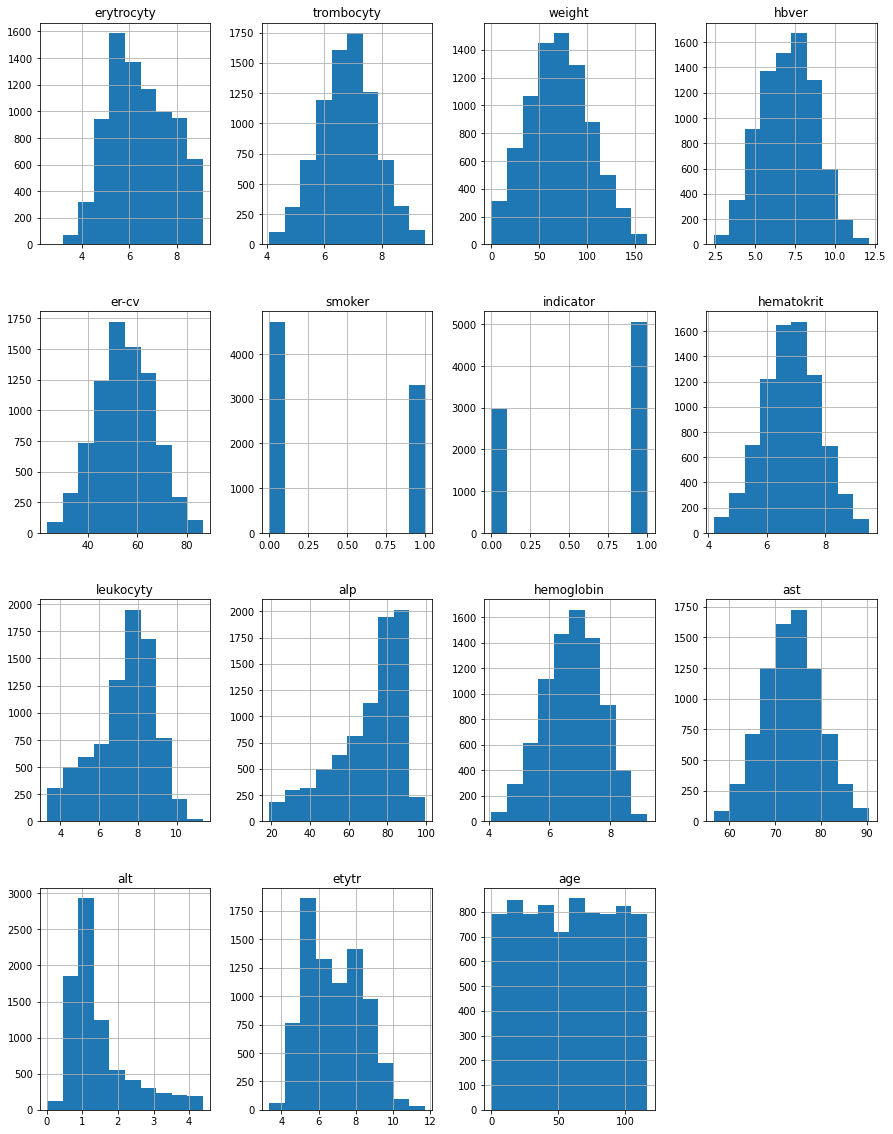

In [158]:
# Zobrazíme si histogram hodnôt až si vieme odhadnúť o aké rozdelenie ide
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_merged.hist(ax = ax)


Vybrané zaujímave atribúty pre iný typ grafu a to trombocyty, leukocyty a atribút alp.

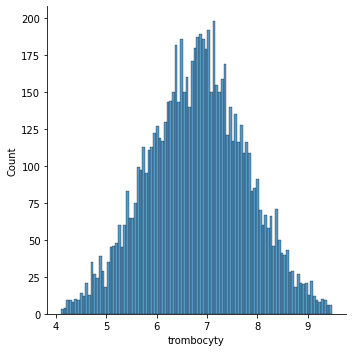

In [159]:
sns.displot(df_merged['trombocyty'],bins=100)

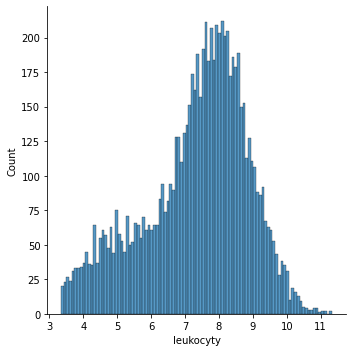

In [160]:
sns.displot(df_merged['leukocyty'],bins=100)

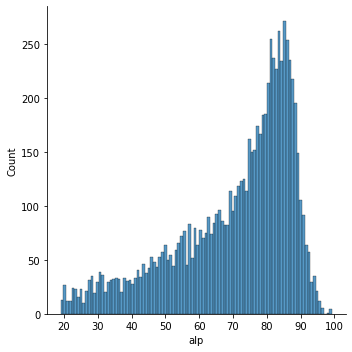

In [161]:
sns.displot(df_merged['alp'],bins=100)

<AxesSubplot:>

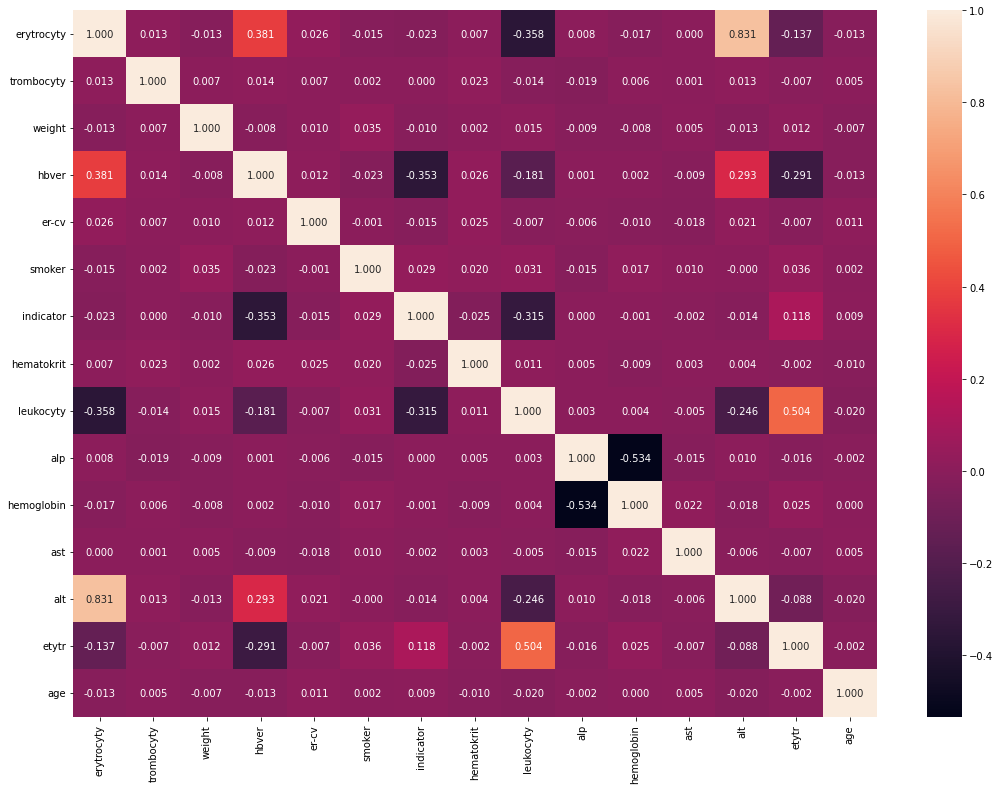

In [162]:
# V tejto tabuľke je vidieť korelácie medzi všetkými vlastnosťami. Najväčšia závislosť je medzi stľpcom electrocyty a alt.
# Ale závislosť pri indicatore aspoň nejaká vyzerá byť pre vlastnosti leukocytov a hbver
# Túto informáciu ďalej použijeme pri hypotézach

fig, ax = plt.subplots(figsize=(18,13))
sns.heatmap(df_merged.corr(), ax=ax, annot=True, fmt=".3f")

Následne ukážeme ako sa ovplyvňuju na grafe jednotlivé atribúty ale pre lepšiu vizualizáciu sme rozdelili na dva grafy.

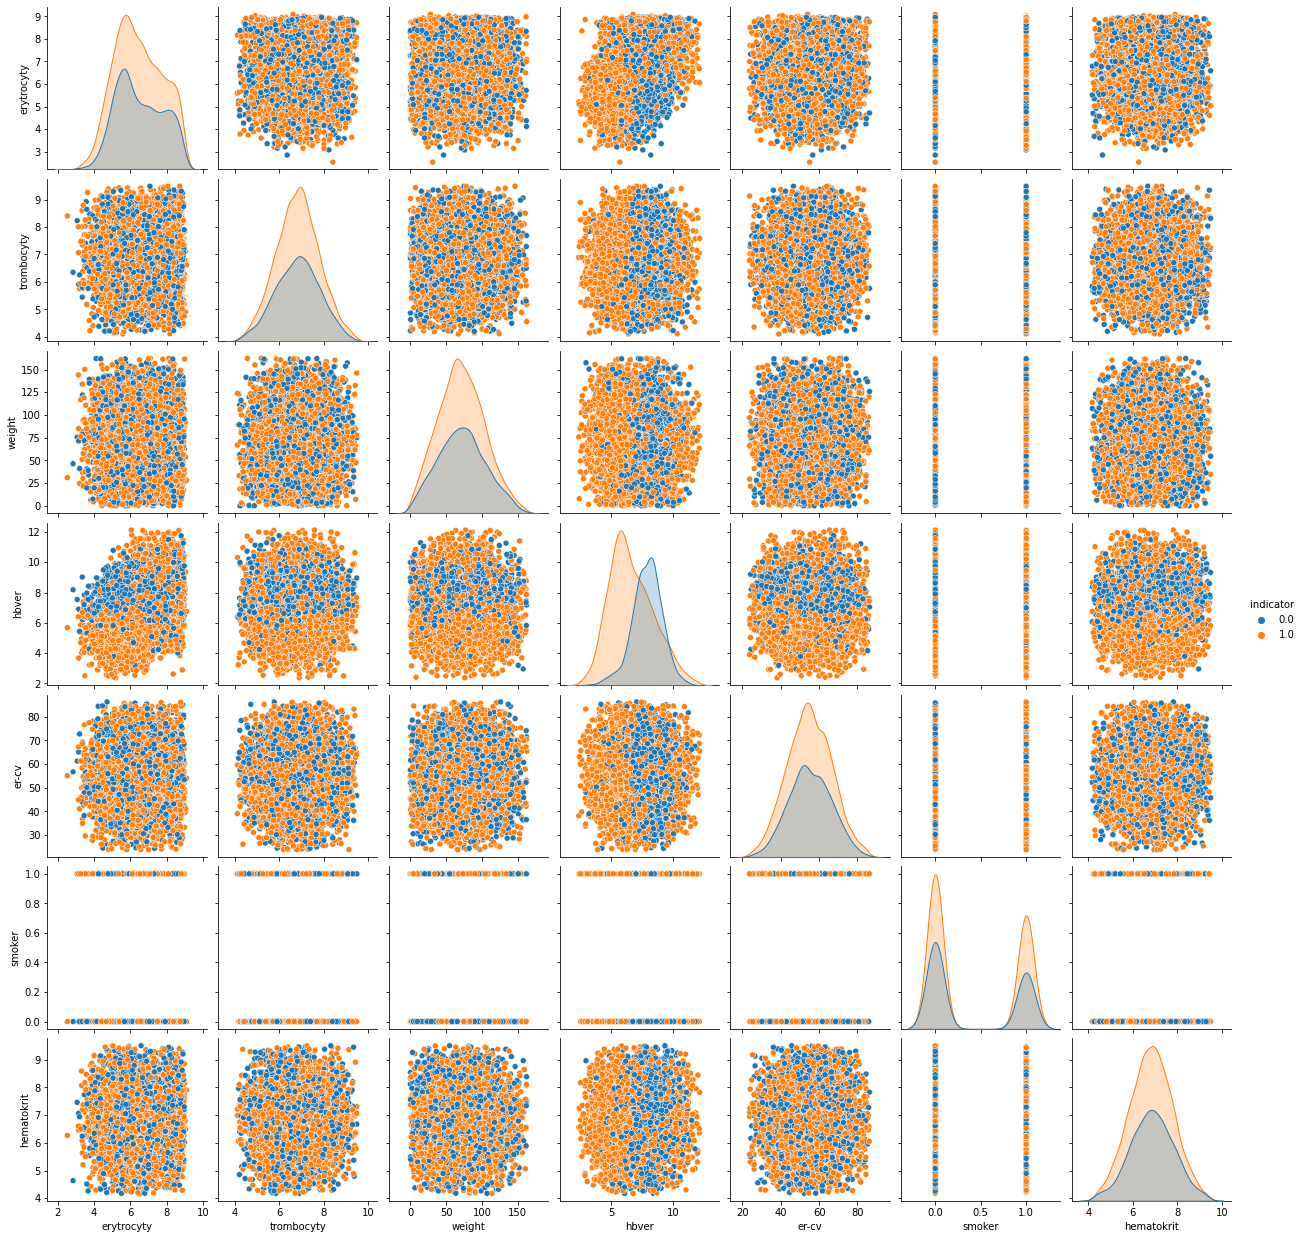

In [163]:
sns.pairplot(df_merged[["erytrocyty", "trombocyty", "weight", "hbver", "er-cv", "smoker","hematokrit",  "indicator"]], hue="indicator")

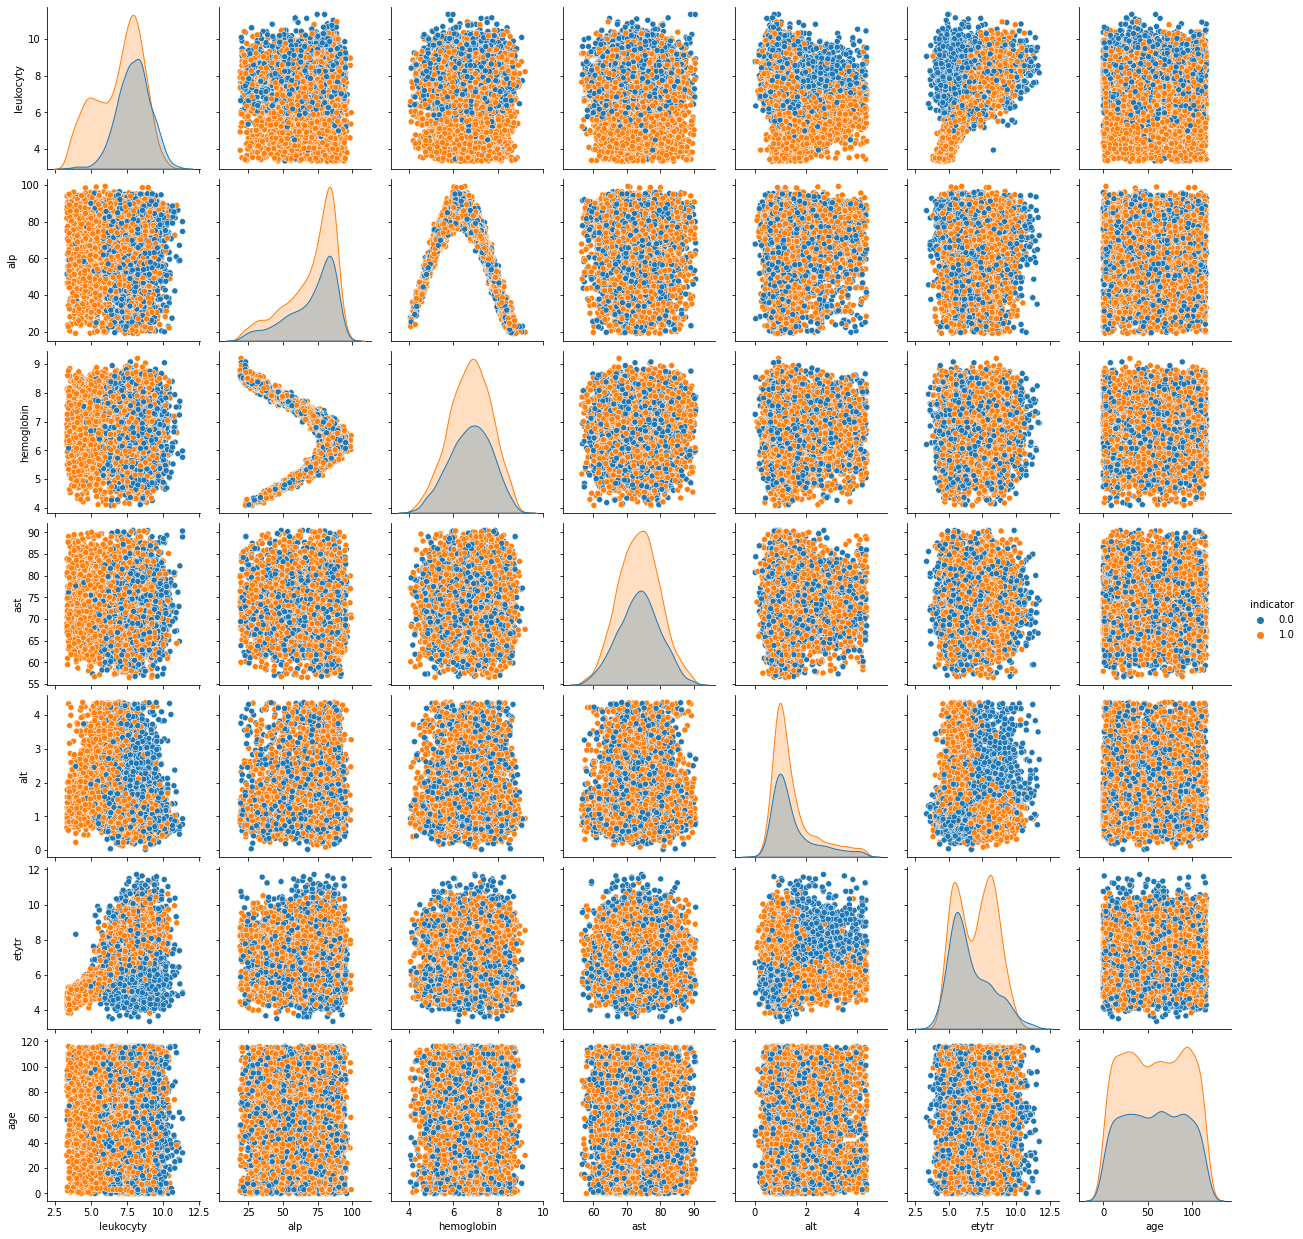

In [164]:
sns.pairplot(df_merged[["leukocyty", "alp", "hemoglobin", "ast", "alt", "etytr", "age", "indicator"]], hue="indicator")

# V tejto sekcií sme vybrali zaujimavé atribúty, ktoré porovnávame s indikátorom.

<AxesSubplot:xlabel='indicator', ylabel='leukocyty'>

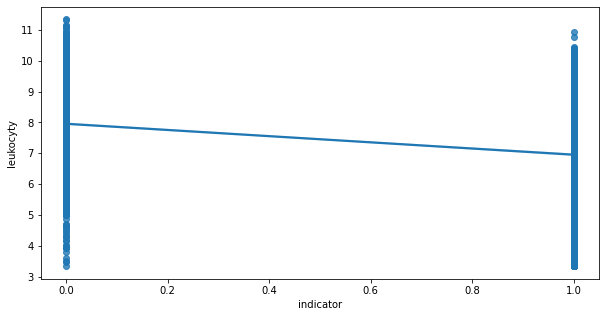

In [165]:
# Možno bude nejaká závislosť, skúsime overiť neskôr

sns.regplot(x="indicator", y="leukocyty", data=df_merged)

<AxesSubplot:xlabel='indicator', ylabel='leukocyty'>

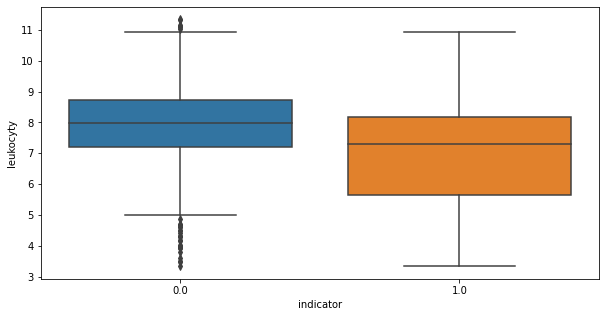

In [166]:
sns.boxplot(x='indicator', y='leukocyty', data=df_merged)

<AxesSubplot:xlabel='indicator', ylabel='hbver'>

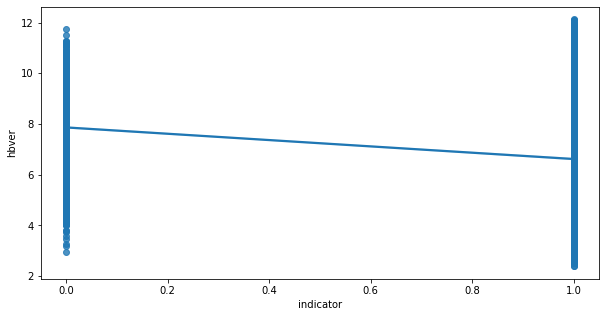

In [167]:
# Možno bude nejaká závislosť, skúsime overiť neskôr

sns.regplot(x="indicator", y="hbver", data=df_merged)

<AxesSubplot:xlabel='indicator', ylabel='hbver'>

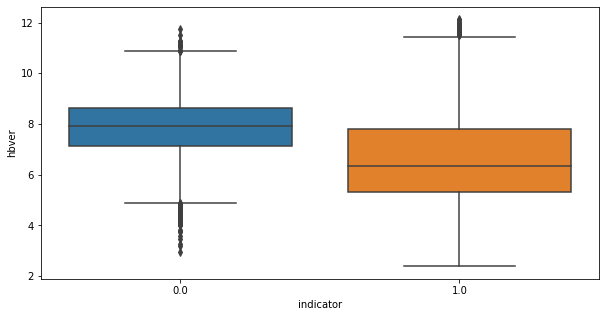

In [168]:
sns.boxplot(x='indicator', y='hbver', data=df_merged)

# V tejto sekcií sme zase vybrali najzaujímavejšie grafy (teraz už bez indikítora)

<AxesSubplot:xlabel='erytrocyty', ylabel='alt'>

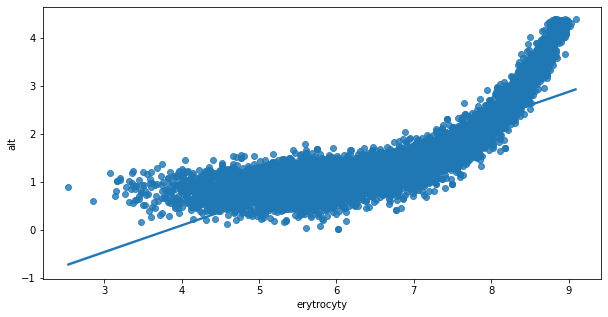

In [169]:
# Zavislost medzi dvomi premennymi, ktore maju najvacsiu hodnotu v heatmap

sns.regplot(x="erytrocyty", y="alt", data=df_merged)

<AxesSubplot:xlabel='hemoglobin', ylabel='alp'>

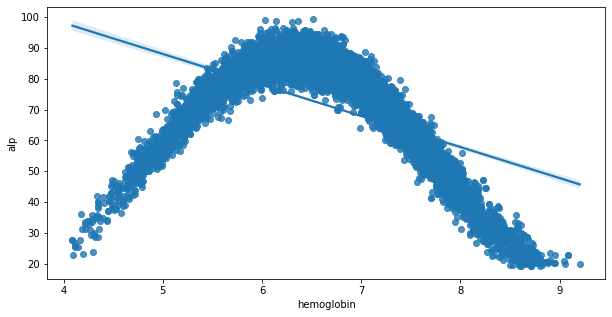

In [170]:
# pekna závislosť medzi hodnotami alp a hemoglobin
sns.regplot(x="hemoglobin", y="alp", data=df_merged)

# 3. Formulácia a štatistické overenie hypotéz o dátach (2 body)

# Hypoteza 1:

H<sub>0</sub> → Hmotnosť chorejšieho človeka je v priemere rovnaká ako hmotnosť menej chorého.

H<sub>1</sub> → Hmotnosť chorejšieho človeka je v priemere iná/väčšia/menšia ako hmotnosť menej chorého.

<AxesSubplot:xlabel='weight', ylabel='Count'>

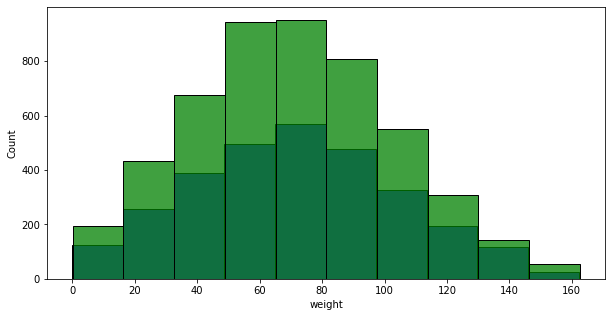

In [171]:
weightZeroIndicator = (df_merged.loc[df_merged["indicator"] == 0])["weight"]
weightOneIndicator = (df_merged.loc[df_merged["indicator"] == 1])["weight"]

sns.histplot(weightZeroIndicator, bins=10, color="blue")
sns.histplot(weightOneIndicator, bins=10, color="green")

Vizuálne môžeme vidieť, že ide možno o podobné rozdelenie.

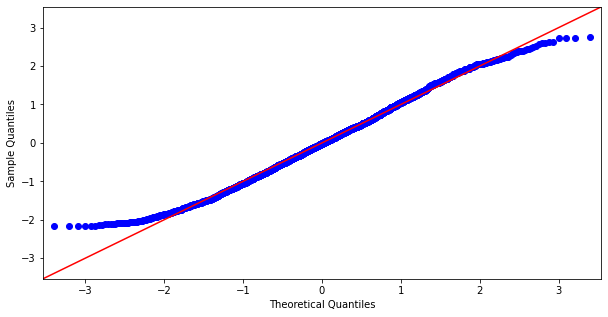

In [172]:
_ = sm.ProbPlot(weightZeroIndicator, fit=True).qqplot(line='45')

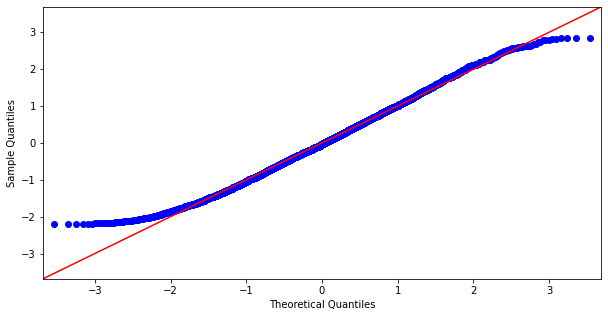

In [173]:
_ = sm.ProbPlot(weightOneIndicator, fit=True).qqplot(line='45')

In [174]:
stats.shapiro(weightZeroIndicator)
# p < 0.05 a teda nemozme pouzit t-test

ShapiroResult(statistic=0.9927950501441956, pvalue=5.082709947368258e-11)

In [175]:
stats.shapiro(weightOneIndicator)
# p < 0.05 a teda nemozme pouzit t-test

C:\Users\matej\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9938326478004456, pvalue=5.832090181883548e-14)

Zo shapiro testov vidíme, že p < 0.05 a teda môžme povedať, že obe serie nepochádzajú z normálneho rozdelenia. Nemôžme použiť t-test.


In [176]:
# Levene test

a = weightZeroIndicator
b = weightOneIndicator
[np.var(x, ddof=1) for x in [a, b]]

levene_test = levene(a, b)
print(levene_test)

alpha = 0.05
if levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

LeveneResult(statistic=3.519197380361728, pvalue=0.06069803755646693)
Equal variances (fail to reject H0)


Z levenovho testu vidíme, že distribúcie majú rovnaké variancie.

In [177]:
# Mann-Whitney U-test
stat, p = mannwhitneyu(weightZeroIndicator, weightOneIndicator)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=7445496.500, p=0.194
Same distributions (fail to reject H0)


# Použili sme Mann-Whitney U-test a vyšlo nám, že H0 nezamietame. P > 0,05 a teda hmotnost zdravych a chorých je v priemere skoro rovnaká.

------------------------------------------------------------------------------------------------------------------------
# Hypoteza 2:

H<sub>0</sub> → Hodnota leukocytov u zdravého človeka, je v priemere rovnaká ako u chorého človeka

H<sub>1</sub> → H<sub>0</sub> zamietame (je iná)

<AxesSubplot:xlabel='leukocyty', ylabel='Count'>

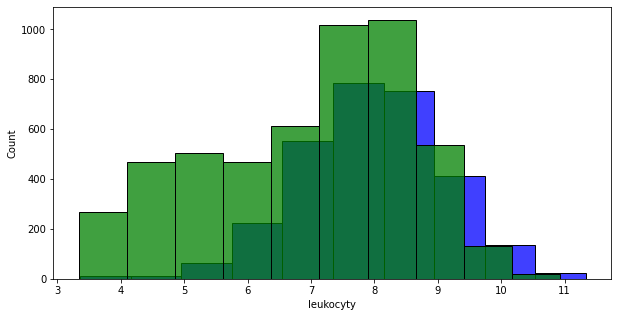

In [178]:
leukocytyZeroIndicator = (df_merged.loc[df_merged["indicator"] == 0])["leukocyty"]
leukocytyOneIndicator = (df_merged.loc[df_merged["indicator"] == 1])["leukocyty"]

sns.histplot(leukocytyZeroIndicator, bins=10, color="blue")
sns.histplot(leukocytyOneIndicator, bins=10, color="green")

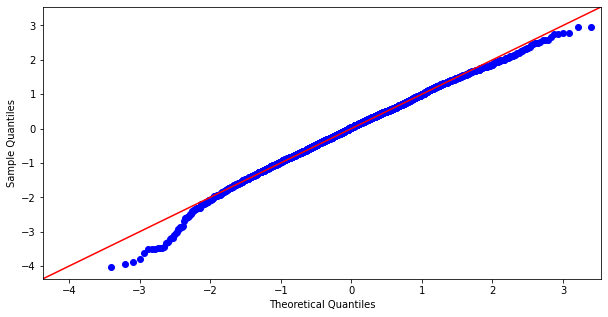

In [179]:
_ = sm.ProbPlot(leukocytyZeroIndicator, fit=True).qqplot(line='45')

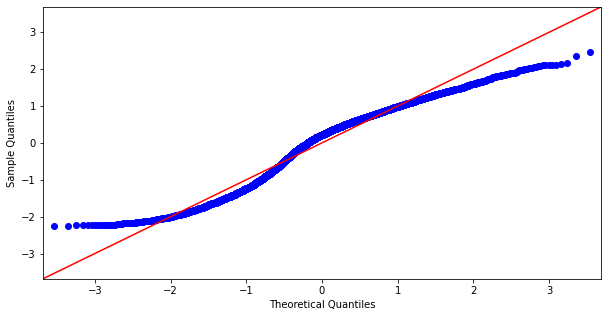

In [180]:
_ = sm.ProbPlot(leukocytyOneIndicator, fit=True).qqplot(line='45')

In [181]:
stats.shapiro(leukocytyZeroIndicator)
# p < 0.05 a teda nemozme pouzit t-test

ShapiroResult(statistic=0.994879961013794, pvalue=1.1806712940654052e-08)

In [182]:
stats.shapiro(leukocytyOneIndicator)
# p < 0.05 a teda nemozme pouzit t-test

C:\Users\matej\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9614877104759216, pvalue=1.0941000913999791e-34)

Zo shapiro testov vidíme, že p < 0.05 a teda môžme povedať, že obe serie nepochádzajú z normálneho rozdelenia. Nemôžme použiť t-test.


In [183]:
# Levene test

a = leukocytyZeroIndicator
b = leukocytyOneIndicator
[np.var(x, ddof=1) for x in [a, b]]

levene_test = levene(a, b)
print(levene_test)

alpha = 0.05
if levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

LeveneResult(statistic=432.5280121930977, pvalue=1.295626814634345e-93)
Another variances (reject H0)


Z levenovho testu vidíme, že distribúcie majú rôzne variancie.

In [184]:
# Mann-Whitney U-test
stat, p = mannwhitneyu(leukocytyZeroIndicator, leukocytyOneIndicator)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=4958271.000, p=0.000
Different distribution (reject H0)


# Použili sme Mann-Whitney U-test a nám vyšlo, že H0 zamietame v prospech H1 a môžme tvrdiť, že rozdiel je signifikantný (p < 0.001). Rozdiel je teda signifikantný.

----------------------------------------------------------------------------------------------------------------------

# Hypoteza 3:

H<sub>0</sub> → Vek chorejšieho človeka je v priemere rovnaký ako vek menej chorého.

H<sub>1</sub> → Vek chorejšieho človeka je v priemere iný ako vek menej chorého.

<AxesSubplot:xlabel='age', ylabel='Count'>

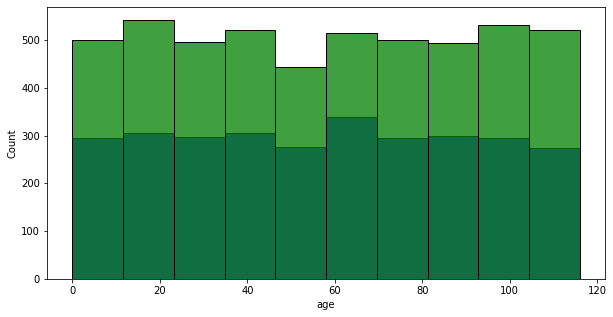

In [185]:
ageZeroIndicator = (df_merged.loc[df_merged["indicator"] == 0])["age"]
ageOneIndicator = (df_merged.loc[df_merged["indicator"] == 1])["age"]

sns.histplot(ageZeroIndicator, bins=10, color="blue")
sns.histplot(ageOneIndicator, bins=10, color="green")

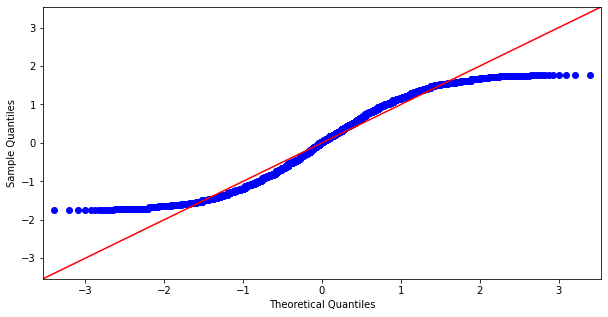

In [186]:
_ = sm.ProbPlot(ageZeroIndicator, fit=True).qqplot(line='45')

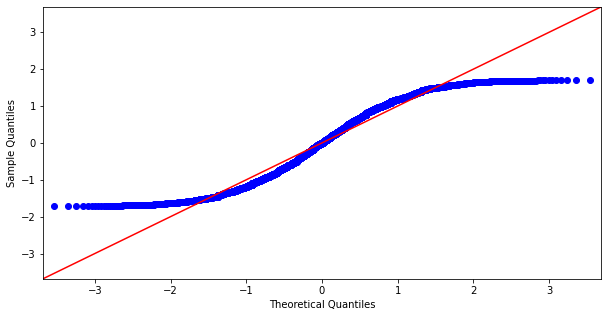

In [187]:
_ = sm.ProbPlot(ageOneIndicator, fit=True).qqplot(line='45')

In [188]:
stats.shapiro(ageZeroIndicator)
# p < 0.05 a teda nemozme pouzit t-test

ShapiroResult(statistic=0.9570435881614685, pvalue=8.719619536117152e-29)

In [189]:
stats.shapiro(ageOneIndicator)
# p < 0.05 a teda nemozme pouzit t-test

C:\Users\matej\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9513784050941467, pvalue=4.870079409147098e-38)

Zo shapiro testov vidíme, že p < 0.05 a teda môžme povedať, že obe serie nepochádzajú z normálneho rozdelenia. Nemôžme použiť t-test.


In [190]:
# Levene test

a = ageZeroIndicator
b = ageOneIndicator
[np.var(x, ddof=1) for x in [a, b]]

levene_test = levene(a, b)
print(levene_test)

alpha = 0.05
if levene_test.pvalue > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

LeveneResult(statistic=4.4848172455063215, pvalue=0.03422782581137903)
Another variances (reject H0)


Z levenovho testu vidíme, že distribúcie majú rovnaké variancie.

In [191]:
# Kruskal-Wallis H Test - aby sme si vyskúšali aj iný ako mann whitneyho test, vieme že tento test sa používa na viacej datasetov naraz

stat, p = kruskal(ageZeroIndicator, ageOneIndicator)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=0.633, p=0.426
Same distributions (fail to reject H0)


# Použili sme Kruskalov test nám vyšlo, ze nezamietame hypotezu H0 a teda v priemere sú tieto hodnoty rovnaké.